In [1]:
import pandas as pd
import numpy as np

In [2]:
X_train = pd.read_csv('csvTrainImages 60k x 784.csv')#csvTrainImages 60k x 784.csv
y_train = pd.read_csv('csvTrainLabel 60k x 1.csv')
X_test = pd.read_csv('csvTestImages 10k x 784.csv')
y_test = pd.read_csv('csvTestLabel 10k x 1.csv')

In [3]:
# Normalise and reshape
X_train=X_train.values.reshape((-1,28,28,1))/255.0
X_test=X_test.values.reshape((-1,28,28,1))/255.0

In [4]:
y_train

,0
0,1
1,2
2,3
3,4
4,5
...,...
59994,5
59995,6
59996,7
59997,8


In [5]:
from sklearn.preprocessing import OneHotEncoder
from keras.utils.np_utils import to_categorical

In [6]:
# OnehotEncode y_train
y_train=to_categorical(y_train, num_classes=10)
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [7]:
y_train = np.array(y_train)

In [8]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [9]:
# OnehotEncode y_train
y_test=to_categorical(y_test, num_classes=10)
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(59999, 28, 28, 1)
(9999, 28, 28, 1)
(59999, 10)
(9999, 10)


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

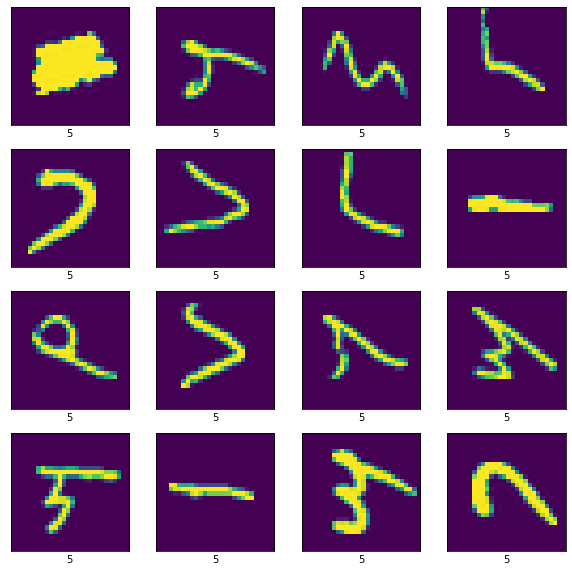

In [44]:
figure = plt.figure(figsize=(10,10))

random_picking = index=np.random.randint(0,23000,16)

for indexing in range(len(random_picking)):
    plt.subplot(4,4,(indexing%25)+1)
    plt.grid(True)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[random_picking[indexing]])
    
    plt.xlabel(y_test[i].argmax(axis=-1))

plt.show()

In [11]:
import tensorflow as tf

In [12]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=5,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")

In [13]:
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
# for general
COMPILE_OPTIMIZER = Adam()
COMPILE_LOSS = "msle" # mean squared logarithmic error
COMPILE_METRICS = ["accuracy"]
INPUT_SHAPE = (X_train.shape[1],X_train.shape[2],X_train.shape[3])
OUTPUT_CLASS = 10

In [19]:
from tensorflow.keras.models import Sequential

In [20]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D,\
ZeroPadding2D, Convolution2D, ZeroPadding2D,AveragePooling2D

In [21]:
Model = Sequential()

Model.add(Conv2D(32,(3,3),activation="relu",input_shape=INPUT_SHAPE))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))

Model.add(Conv2D(64,(3,3),activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2)))
Model.add(BatchNormalization())

Model.add(Conv2D(128,(3,3),activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2)))
Model.add(BatchNormalization())


Model.add(Flatten())
Model.add(Dense(128,activation="relu"))
Model.add(BatchNormalization())
Model.add(Dropout(0.5))
Model.add(Dense(64,activation="relu"))
Model.add(BatchNormalization())
Model.add(Dropout(0.5))
Model.add(Dense(OUTPUT_CLASS,activation="softmax"))

In [22]:
Model.compile(optimizer=COMPILE_OPTIMIZER,loss=COMPILE_LOSS,metrics=COMPILE_METRICS)

In [23]:
CNN_Model = Model.fit(X_train,y_train,
                      validation_data=(X_test,y_test),
                      callbacks=[Early_Stopper,Checkpoint_Model],
                      batch_size=12,
                      epochs=10)

Epoch 1/10
5000/5000 [==============================] - 52s 10ms/step - loss: 0.0068 - accuracy: 0.9066 - val_loss: 0.0017 - val_accuracy: 0.9775
Epoch 2/10
5000/5000 [==============================] - 51s 10ms/step - loss: 0.0031 - accuracy: 0.9605 - val_loss: 0.0015 - val_accuracy: 0.9797
Epoch 3/10
5000/5000 [==============================] - 52s 10ms/step - loss: 0.0024 - accuracy: 0.9694 - val_loss: 0.0014 - val_accuracy: 0.9824
Epoch 4/10
5000/5000 [==============================] - 53s 11ms/step - loss: 0.0020 - accuracy: 0.9738 - val_loss: 0.0011 - val_accuracy: 0.9866
Epoch 5/10
5000/5000 [==============================] - 54s 11ms/step - loss: 0.0018 - accuracy: 0.9762 - val_loss: 0.0011 - val_accuracy: 0.9854
Epoch 6/10
5000/5000 [==============================] - 54s 11ms/step - loss: 0.0018 - accuracy: 0.9776 - val_loss: 0.0010 - val_accuracy: 0.9875
Epoch 7/10
5000/5000 [==============================] - 53s 11ms/step - loss: 0.0017 - accuracy: 0.9787 - val_loss: 0.0011 -

In [25]:
Model_Results = Model.evaluate(X_test,y_test)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

313/313 [==============================] - 1s 4ms/step - loss: 9.1276e-04 - accuracy: 0.9887
LOSS:  0.0009
ACCURACY:  0.99


<AxesSubplot:>

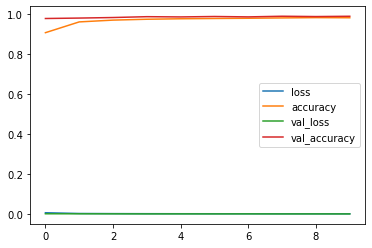

In [26]:
Grap_Data = pd.DataFrame(CNN_Model.history)
Grap_Data.plot()

In [29]:
Prediction_Results = Model.predict(X_test)

In [30]:
Model_Test_Prediction = Prediction_Results.argmax(axis=-1)

In [31]:
Model_True_Values = y_test.argmax(axis=-1)

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

In [33]:
print(confusion_matrix(Model_True_Values,Model_Test_Prediction))

[[984   3   0   0   1   9   0   1   1   0]
 [ 10 990   0   0   0   0   0   0   0   0]
 [  3   2 986   3   1   4   0   0   1   0]
 [  0   4  10 985   0   0   0   1   0   0]
 [  0   2   6   1 987   3   0   1   0   0]
 [  6   0   5   0   0 981   0   3   2   3]
 [  4   4   0   0   1   0 989   0   0   2]
 [  0   0   0   0   0   2   0 998   0   0]
 [  0   0   1   0   0   1   0   0 998   0]
 [  2   1   1   1   0   4   2   1   0 988]]


In [34]:
print(classification_report(Model_True_Values,Model_Test_Prediction))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       999
           1       0.98      0.99      0.99      1000
           2       0.98      0.99      0.98      1000
           3       0.99      0.98      0.99      1000
           4       1.00      0.99      0.99      1000
           5       0.98      0.98      0.98      1000
           6       1.00      0.99      0.99      1000
           7       0.99      1.00      1.00      1000
           8       1.00      1.00      1.00      1000
           9       0.99      0.99      0.99      1000

    accuracy                           0.99      9999
   macro avg       0.99      0.99      0.99      9999
weighted avg       0.99      0.99      0.99      9999



In [35]:
print(Model_Test_Prediction)

[1 2 3 ... 7 8 9]


In [36]:
print(y_test[1].argmax(axis=-1))

2


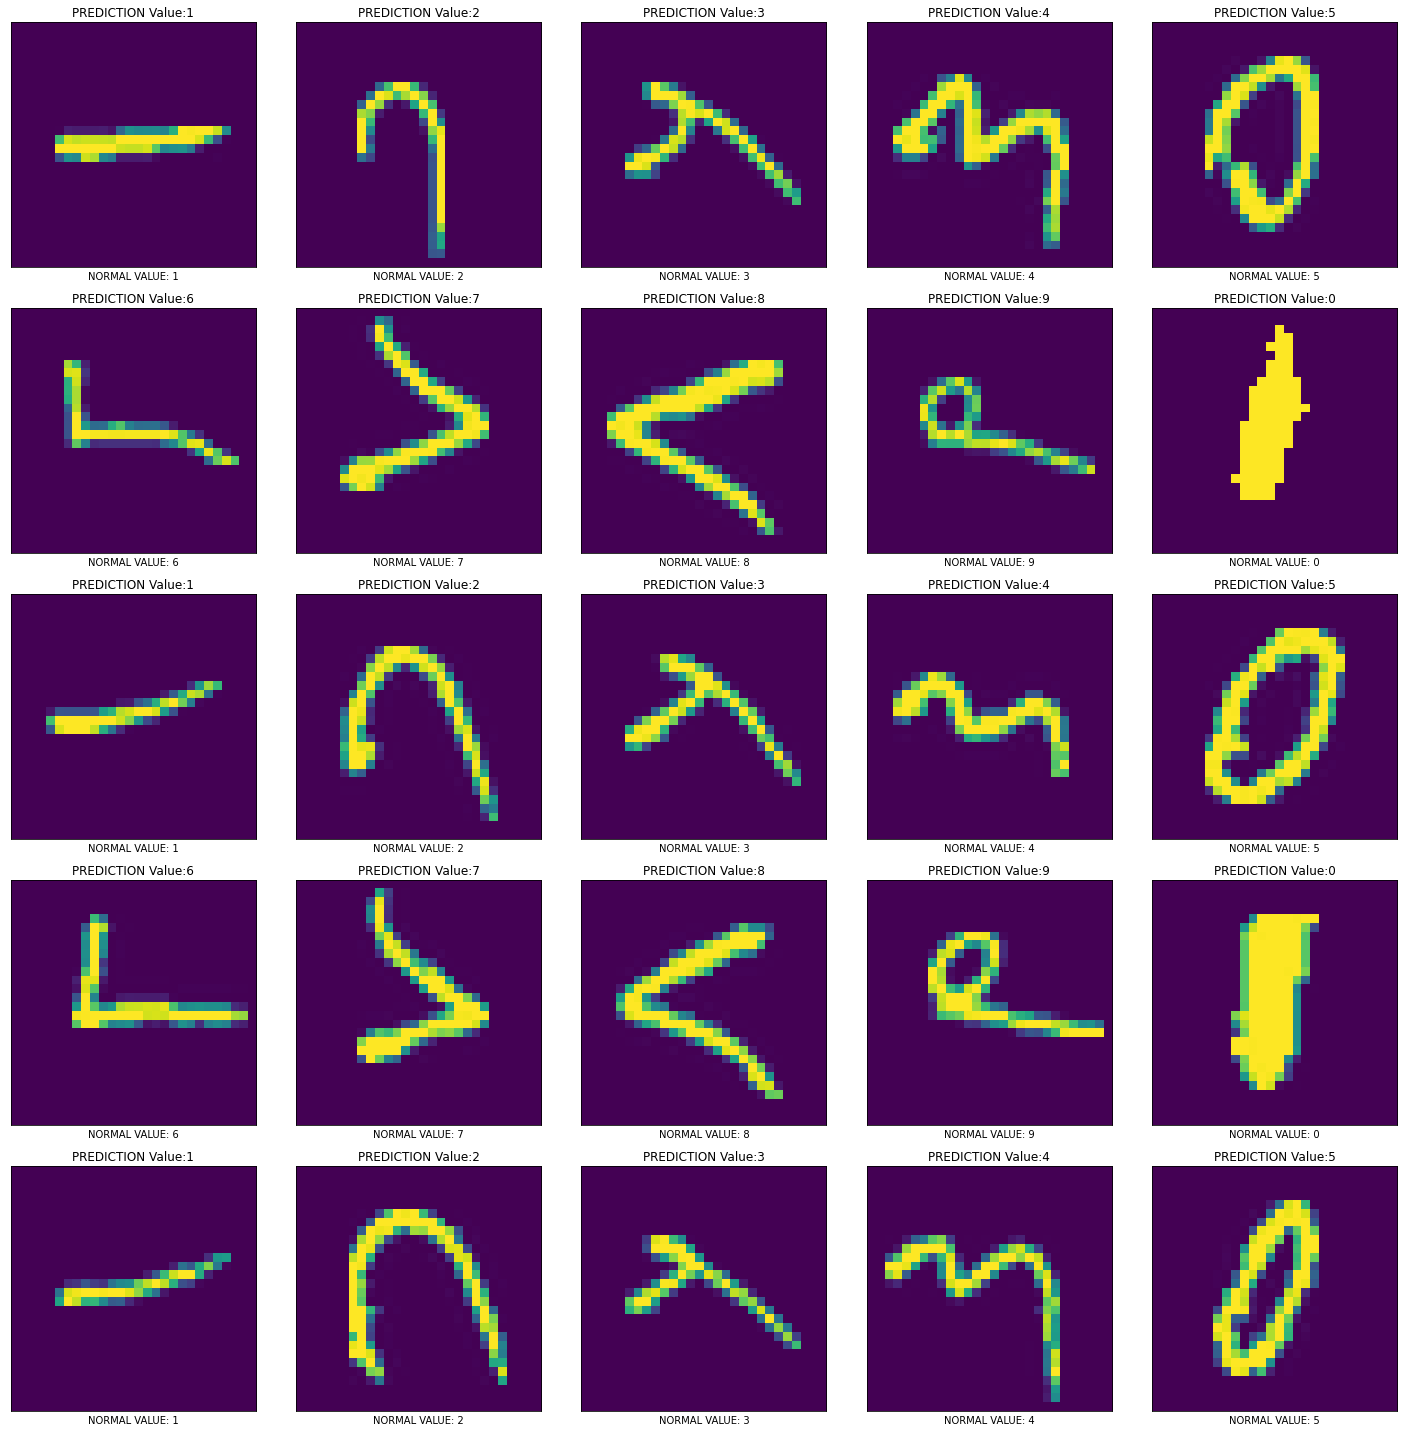

In [48]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i])
    ax.set_title(f"PREDICTION Value:{Model_Test_Prediction[i]}")
    ax.set_xlabel(f"NORMAL VALUE: {y_test[i].argmax(axis=-1)}")
plt.tight_layout()
plt.show()